# CH 3-1
회귀분석 : 샘플을 몇 개의 클래스 중 하나로 분류

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

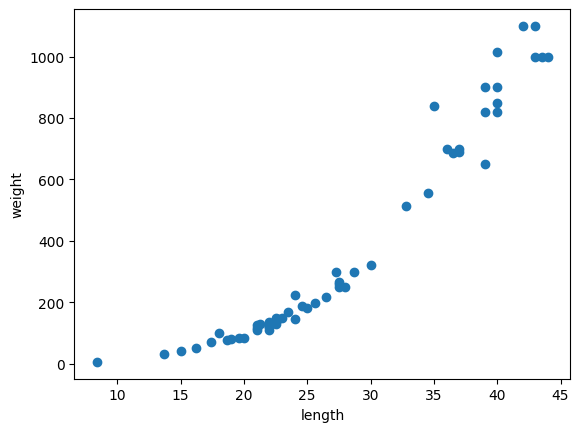

In [3]:
# 전처리 이전 raw 데이터 확인
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 농어의 길이가 커짐에 따라 무게도 늘어남을 확인 가능

In [5]:
# 훈련 set, 테스트 set 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [6]:
# sklearn에 사용할 배열은 2차원 배열 이어야 함. 그러나 perch_length가 1차원 배열 이므로 train_input, test_input도 1차원 배열임
# 배열을 나타내는 방식만 2차원 배열로 바꾸고, 각 배열에 있는 원소의 개수는 동일하도록 설정
# 사용하는 특성이 1개이므로 수동으로 2차원 배열 만들어야 함
# reshape() : 배열의 크기를 바꾸어줌
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2,2)
# reshape(바꾸려는 배열의 크기), 이때 매서드에 지정한 크기가 원본 배열에 있는 원소의 개수와 다른 경우 에러 발생
# 2*2 = 4 이므로 여기선 개수 =
# (4,)크기의 배열을 (2,3)으로는 지정 불가능; 4와 2*3의 값이 서로 다르기 때문!
print(test_array.shape)

(2, 2)


In [9]:
# -1 : 배열 크기 자동 지정, 다른 차원을 채우고 남은 원소에 맞게 차원을 지정하라는 의미임
# reshape(-1,1)하면 배열의 전체 원소 길이 알고있지 않아도 자동맞춤이 되므로 편리함
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
# k-최근접 이웃 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

# 결정계수(R^2)
*   분류의 경우 정답을 맞춘 테스트 샘플 수 / 전체 테스트 샘플 수
*   회귀의 경우 정답이 없으므로 결정계수(R^2)로 모델 평가
* 결정 계수 = 1 - {Σ(target - 예측)^2/Σ(target - 평균)^2}
* 1에 가까운 값일 수록 좋음

In [12]:
print(knr.score(test_input, test_target))

0.992809406101064


In [13]:
# 테스트 세트에 대한 평균 절댓값 오차 계산
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 예측값이 실제값과 평균 'mae'그램 만큼 오차가 발생함을 알 수 있음

19.157142857142862


훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델 평가 진행했는데 이제부터 훈련set로도 모델 평가~

In [15]:
print(knr.score(train_input, train_target))

0.9698823289099254


**과대적합**
* 훈련세트에서 score()가 높았으나 test set의 score()값이 낮은 경우
* 훈련세트에만 잘 맞는 모델이라는 의미
**과소적합**
* 훈련 set의 점수 < test set 점수
* 훈련, test 점수 둘다 낮은 경우
* 모델이 너무 단순해 훈련 세트에 의하 적절히 훈련되지 않은 경우

In [19]:
# k-최근접 이웃 class에서는 이웃의 수를 줄이면 훈련세트의 결정 계수 값을 올릴 수 있음
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [21]:
print(knr.score(test_input, test_target))

0.9746459963987609


# CH 3-2

In [22]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [23]:
from sklearn.model_selection import train_test_split
# test set 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
# 훈련, test 세트 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [24]:
# k-NR 모델 훈련
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# 길이 50cm 농어 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


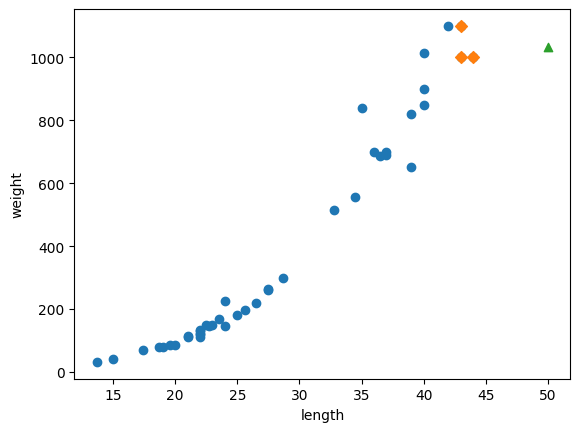

In [29]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])
# 산점도 작성
plt.scatter(train_input, train_target)
# 훈련 set 중 이웃 sample만 다이아몬드 형태로 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
# 이웃 무게 평균 출력
print(np.mean(train_target[indexes]))

1033.3333333333333


농어 길이가 늘어날수록 무게가 늘어나는 경향이 있으나,  50cm 농어에서 가장 가까운 샘플들은 45cm 근방의 개체들이므로 이 '이웃들의 평균'을 샘플 타깃의 평균으로 줌. 따라서 **새로운 샘플이 훈련세트의 범위를 벗어나면 엉뚱한 값을 예측할 수도 있음** => 길이기 100cm인 농어가 새로들어와도 새로 들어온 100cm농어의 무게는 가까운 이웃인 45cm농어들의 평균무게로 나올 것이기 때문!

In [32]:
print(knr.predict([[100]]))

[1033.33333333]


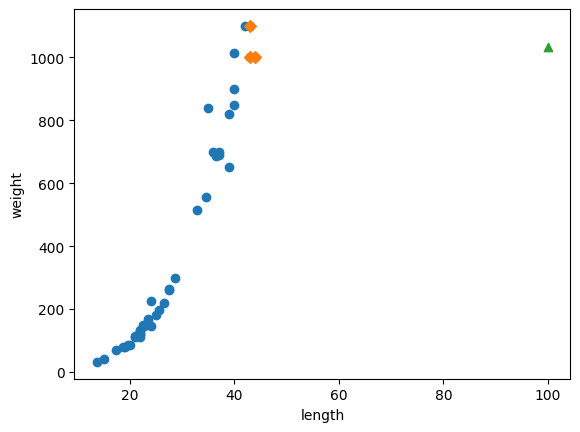

In [33]:
# 100cm 농어로 회귀 진행
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])
# 산점도 작성
plt.scatter(train_input, train_target)
# 훈련 set 중 이웃 sample만 다이아몬드 형태로 그림
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
#100cm 농어 데이터
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# **선형 회귀**
* 데이터의 특성을 가장 잘 반영하는 직선을 찾아 회귀분석
* 선형 회귀는 입력과 타깃 사이의 관계가 선형인게 아니라 **가중치와 타깃 사이의 관계**가 있다는 의미임

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [35]:
# linear regression 결과 클래스가 찾은 기울기(lr.coef)와 y절편(lr.intercept)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


머신러닝에서 **기울기 = 계수(coefficient), 가중치(weight)** 라고 부름
coef_, intercept를 머신러닝 알고리즘이 찾은 값이라는 의미에서 모델 파라미터라고도 부름
# 모델 기반 학습
머신러닝 알고리즘 훈련을 통해 최적의 모델 파라미터 값을 찾는 경우
# 사례 기반 학습
머신러닝 알고리즘 훈련 세트를 저장하는것이 훈련의 전부이고 모델 파라미터가 없는 경우

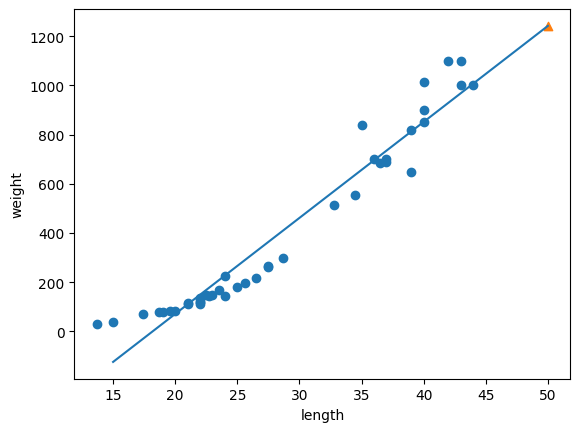

In [37]:
# 훈련 set산점도 그리기
plt.scatter(train_input, train_target)
# 15 ~ 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
# R^2 계산
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항 회귀
* 최적의 곡선을 찾음
* 2차 방정식의 그래프를 회귀곡선으로 그리기 위해서는 길이를 제곱한 항이 훈련 세트에 추가되어야함. (x^2 항에 해당)
* 이때 train_target, test_target값은 제곱항을 넣을 필요 없이 **타깃 값은 그대로 사용**
* 목표하는 타깃 값은 어던 그래프를 훈련하든지 바꿀 필요 없음
* 다만 테스트할 때에는 제곱 값과 원래 값 모두를 input으로 넣어줘야함

In [39]:
# 길이^2 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [40]:
print(train_poly.shape, test_poly.shape) # 열 개수 늘어남 확인

(42, 2) (14, 2)


In [41]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [42]:
print(lr.coef_, lr.intercept_) # [] 뒤에 나오는 값은 상수항임

[  1.01433211 -21.55792498] 116.0502107827827


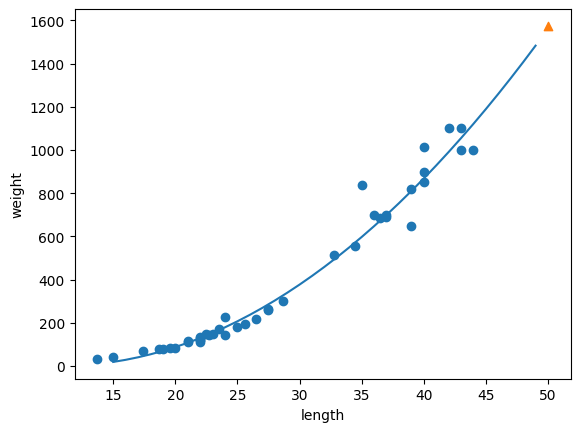

In [43]:
# 구간 별 직선을 그리기 위햇 15~49까지 정수배열 만듦
point = np.arange(15, 50)
# 훈련세트의 산점도 작성
plt.scatter(train_input, train_target)
# 15 ~ 49까지 2차 함수 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
# R^2 계산
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# **CH 3-3

**다중 회귀**
* 2개의 특성을 이용해 학습하는 경우 평면을 학습

**특성 공학**
* 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업


In [46]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data') # csv 파일 : ,로 나눠져 있는 텍스트파일
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [47]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [48]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [53]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [54]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [55]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [56]:
test_poly = poly.transform(test_input)

**다중 회귀 모델**

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [58]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [59]:
poly = PolynomialFeatures(degree=5,include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [60]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [61]:
print(lr.score(test_poly, test_target))

-144.40579436844948


**규제**

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [65]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [66]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [73]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [74]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled,test_target))

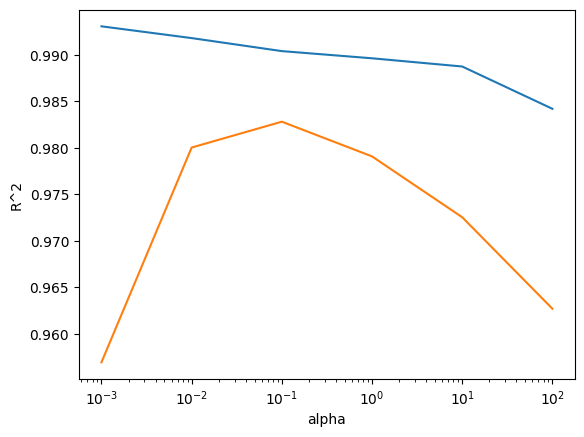

In [82]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [83]:
ridge = Ridge(alpha =0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


**라쏘 회귀**

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [85]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [87]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


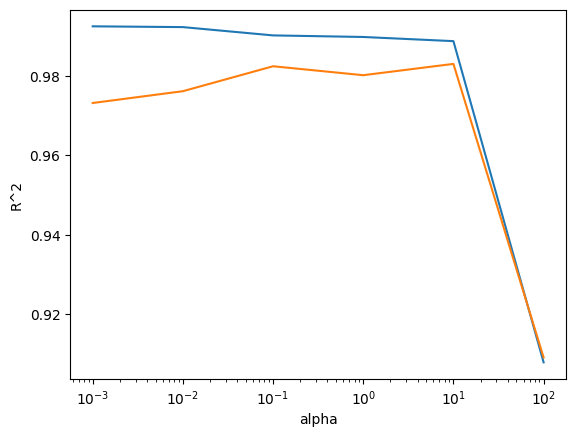

In [88]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [90]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [91]:
print(np.sum(lasso.coef_ == 0))

40
